# Load and Explore the Dataset

## Explore and understand your dataset by:

### Displaying basic information, sample rows, and statistics.
### Identifying missing values.
### Visualizing the target variable (Fraud History).
### Exploring distributions of key numerical features.
### Generating a correlation heatmap for numeric columns.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

# Load the dataset
file_path = 'health_insurance_fraud_large_dataset_v1.csv'
df = pd.read_csv(file_path)

# Display basic information
print("Dataset Information:\n")
print(df.info())

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Provider ID               10000 non-null  object 
 1   Procedure codes/CPT Code  10000 non-null  int64  
 2   Billing frequency         10000 non-null  object 
 3   Patient ID                10000 non-null  object 
 4   Total amount              10000 non-null  float64
 5   Doctor Name               10000 non-null  object 
 6   Doctor Specialization     10000 non-null  object 
 7   Hospital Name             10000 non-null  object 
 8   Room Category             10000 non-null  object 
 9   Hospitalization Reason    10000 non-null  object 
 10  Date of Admission         10000 non-null  object 
 11  Date of Discharge         10000 non-null  object 
 12  Insurance Company Name    10000 non-null  object 
 13  Fraud History             10000 non-null

In [2]:
# Display sample rows
print("\nSample Rows:\n")
print(df.head())



Sample Rows:

  Provider ID  Procedure codes/CPT Code Billing frequency Patient ID  \
0    eb621970                     95225           Monthly   1f1c8ab3   
1    c6c6bcc0                     34865            Weekly   eb49f715   
2    ace80cad                     35093           Monthly   7f088d60   
3    42e9f738                     81602             Daily   c67fb03e   
4    e30338ab                     27037           Monthly   96eee7ea   

   Total amount     Doctor Name Doctor Specialization         Hospital Name  \
0       6062.63   Mary Delacruz          Cardiologist             Petty LLC   
1      43743.11    John Aguirre           Neurologist        Tanner-Salazar   
2      21696.85  Jesus Meyer MD         Dermatologist         Lara and Sons   
3      12117.92     Robin Jones            Oncologist  Vega, Lewis and Sims   
4      31336.42    Sue Gonzales         Dermatologist            Brown-Hart   

  Room Category Hospitalization Reason  ...        Fraud History  \
0       G

In [3]:
#  --> Display summary statistics
print("\nSummary Statistics:\n")
print(df.describe())


Summary Statistics:

       Procedure codes/CPT Code  Total amount   Claim Limits  Premium Amount  \
count               10000.00000  10000.000000   10000.000000    10000.000000   
mean                55104.69580  25331.521568  105689.595444     1104.470090   
std                 25931.04004  14114.223200   55008.711374      521.932325   
min                 10009.00000   1001.350000   10007.630000      200.020000   
25%                 32523.50000  13021.815000   57824.947500      648.675000   
50%                 55173.50000  25449.750000  106665.660000     1109.375000   
75%                 77692.25000  37471.935000  153581.402500     1562.005000   
max                 99971.00000  49998.660000  199988.160000     1999.500000   

       Treatment Expenses  
count        10000.000000  
mean         25375.751204  
std          14246.435173  
min            502.800000  
25%          12935.130000  
50%          25485.115000  
75%          37557.305000  
max          49997.680000  


In [4]:
# Check for missing values
print("\nMissing Values:\n")
print(df.isnull().sum())


Missing Values:

Provider ID                 0
Procedure codes/CPT Code    0
Billing frequency           0
Patient ID                  0
Total amount                0
Doctor Name                 0
Doctor Specialization       0
Hospital Name               0
Room Category               0
Hospitalization Reason      0
Date of Admission           0
Date of Discharge           0
Insurance Company Name      0
Fraud History               0
Network Partners            0
Policy Number               0
Policy Type                 0
Claim Limits                0
Premium Amount              0
Start Date                  0
End Date                    0
Hospitalized Date           0
Treatment Expenses          0
dtype: int64


/var/folders/2c/h9d7v7vx5215nl8jj0vpk8dc0000gn/T/ipykernel_83600/2793853701.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Fraud History', data=df, palette='Set2')


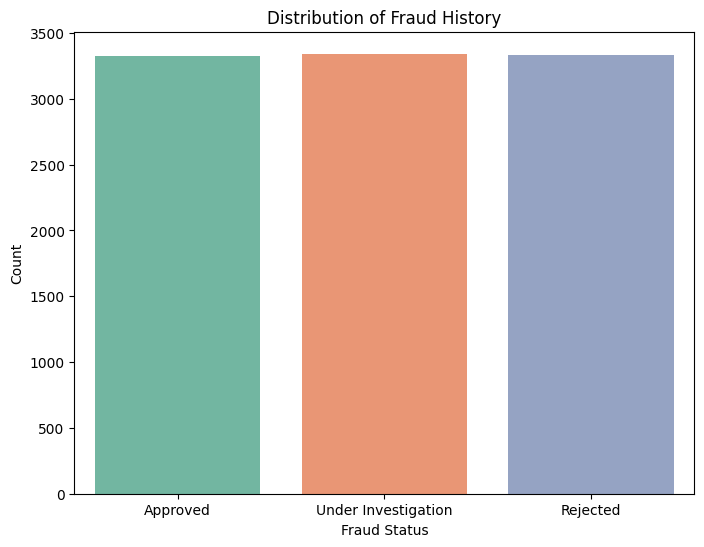

In [5]:
# Visualize the Target Variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Fraud History', data=df, palette='Set2')
plt.title('Distribution of Fraud History')
plt.xlabel('Fraud Status')
plt.ylabel('Count')
plt.show()

<Figure size 1200x800 with 0 Axes>

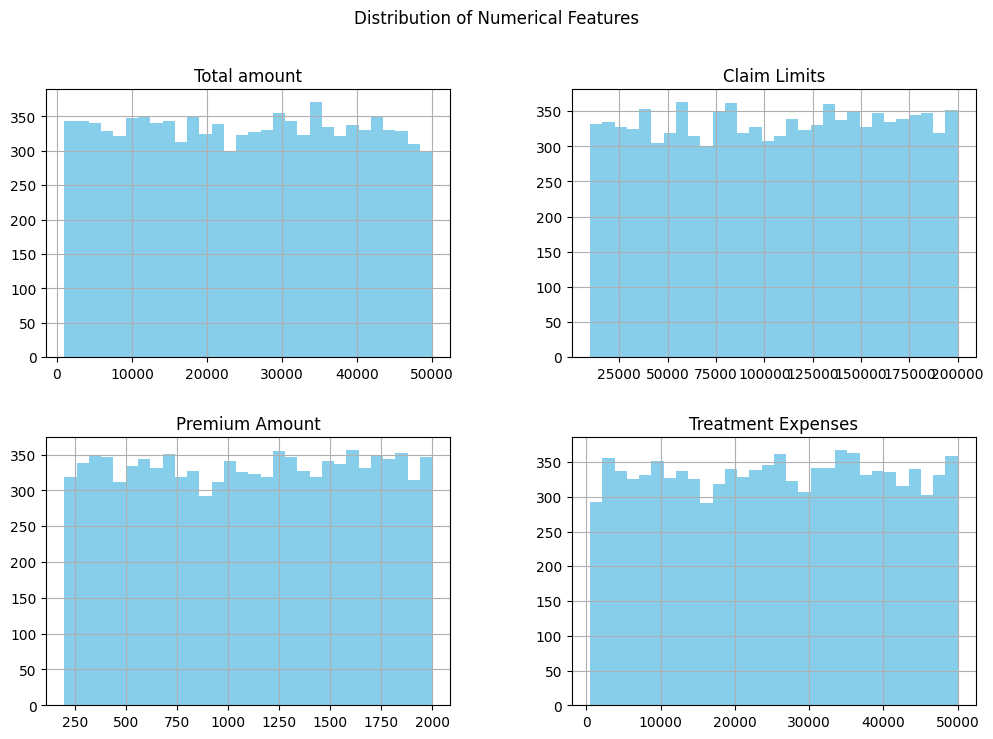

In [6]:
# Explore Numerical Features
plt.figure(figsize=(12, 8))
df[['Total amount', 'Claim Limits', 'Premium Amount', 'Treatment Expenses']].hist(bins=30, figsize=(12, 8), layout=(2, 2), color='skyblue')
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Correlation Heatmap


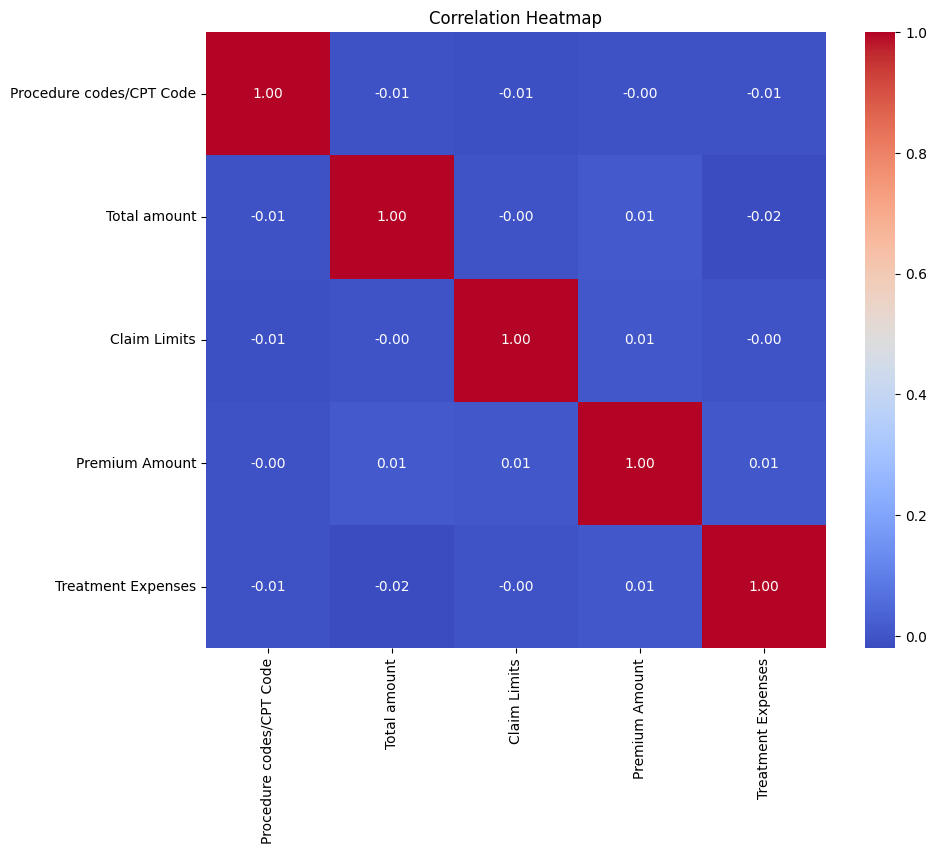

In [7]:
# Correlation Heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Data Preprocessing

## -->  Data Preprocessing steps, including:

### ---> Handling missing values.
### ---> Converting dates to datetime and calculating the length of stay.
### ---> Encoding categorical variables.
### ---> Scaling numerical features.
### ---> Displaying the preprocessed data.


##  Handle Missing Values
### Drop rows with missing values (if any)

In [8]:
# Handle Missing Values

# Drop rows with missing values (if any)

df.dropna(inplace=True)

In [9]:
# Convert Dates to Datetime Format
date_cols = ['Date of Admission', 'Date of Discharge', 'Start Date', 'End Date', 'Hospitalized Date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

/var/folders/2c/h9d7v7vx5215nl8jj0vpk8dc0000gn/T/ipykernel_83600/4077075196.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
/var/folders/2c/h9d7v7vx5215nl8jj0vpk8dc0000gn/T/ipykernel_83600/4077075196.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
/var/folders/2c/h9d7v7vx5215nl8jj0vpk8dc0000gn/T/ipykernel_83600/4077075196.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
/var/folders/2c/h9d7v7vx5215nl8jj0vpk8dc000

In [10]:
# --> Create a new feature for the length of stay
df['Length of Stay'] = (df['Date of Discharge'] - df['Date of Admission']).dt.days

In [11]:
# --> Drop original datetime columns
df.drop(date_cols, axis=1, inplace=True)

In [12]:
# Encode Categorical Variables
label_encoder = LabelEncoder()
df['Fraud History'] = label_encoder.fit_transform(df['Fraud History'])

In [13]:
# -->  Automatically encode all object (categorical) columns
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [14]:
# Scale Numerical Features

scaler = StandardScaler()
numeric_cols = ['Total amount', 'Claim Limits', 'Premium Amount', 'Treatment Expenses', 'Length of Stay']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [15]:
# Verify Preprocessed Data
print("\nPreprocessed Data Sample:\n")
print(df.head())


Preprocessed Data Sample:

   Provider ID  Procedure codes/CPT Code  Billing frequency  Patient ID  \
0         9239                     95225                  1        1181   
1         7810                     34865                  2        9188   
2         6784                     35093                  1        4918   
3         2609                     81602                  0        7649   
4         8899                     27037                  1        5846   

   Total amount  Doctor Name  Doctor Specialization  Hospital Name  \
0     -1.365279         6077                      0           5946   
1      1.304536         4252                      2           7448   
2     -0.257531         4160                      1           4191   
3     -0.936237         7696                      3           7840   
4      0.425471         8507                      1            837   

   Room Category  Hospitalization Reason  Insurance Company Name  \
0              0                

# Model Building

### Split Data: Train-test split (e.g., 70% train, 30% test).
### Model Selection: Use a combination of models for comparison:
### Logistic Regression (Baseline)
### Random Forest (Robust for structured data)
### XGBoost (High performance on tabular data)
### Hyperparameter Tuning: Use GridSearchCV or RandomizedSearch for best parameters.


In [16]:
## 1. Define Features and Target
X = df.drop(['Fraud History', 'Provider ID', 'Patient ID', 'Doctor Name', 'Hospital Name', 'Policy Number'], axis=1)
y = df['Fraud History']

In [17]:
# 2. Split Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
# 3. Initialize and Train the Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
# 4. Make Predictions
y_pred = model.predict(X_test)

# Model Evaluation

## Metrics to Track:

### --> Accuracy (general performance)
### --> Precision & Recall (important for fraud detection)
### --> F1-Score (balance between precision and recall)
### --> ROC Curve & AUC (evaluate classification probability)


In [20]:
## 1. Accuracy
print("\nModel Evaluation:\n")
print("Accuracy:", accuracy_score(y_test, y_pred))


Model Evaluation:

Accuracy: 0.338


In [21]:
# 2. Confusion Matrix and Classification Report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[360 273 319]
 [378 318 364]
 [362 290 336]]
              precision    recall  f1-score   support

           0       0.33      0.38      0.35       952
           1       0.36      0.30      0.33      1060
           2       0.33      0.34      0.33       988

    accuracy                           0.34      3000
   macro avg       0.34      0.34      0.34      3000
weighted avg       0.34      0.34      0.34      3000



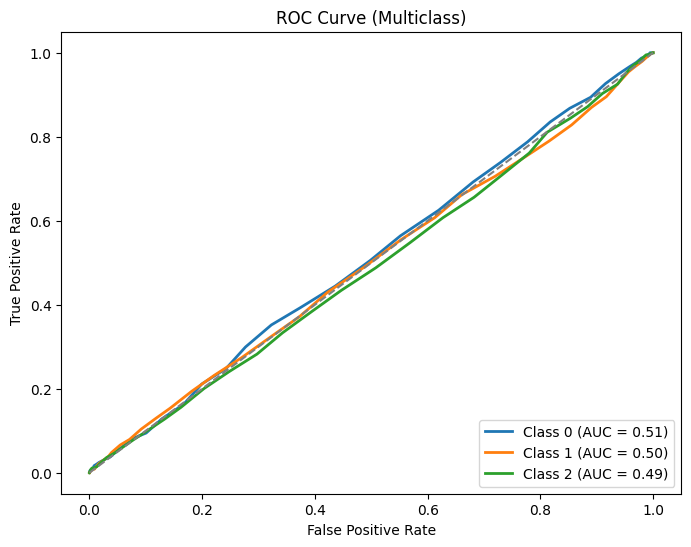

In [22]:
# 3. ROC Curve and AUC (for multiclass classification)
y_prob = model.predict_proba(X_test)
y_test_binarized = label_binarize(y_test, classes=range(y_prob.shape[1]))

plt.figure(figsize=(8, 6))
for i in range(y_prob.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multiclass)')
plt.legend(loc='lower right')
plt.show()